In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Gradients

### Mathematical Definition

The gradient $\nabla f$ of a function is the vector of all its partial derivatives:

$\nabla f = \begin{bmatrix} 
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}$

For a two-variable function $f(x,y)$, the gradient is:

$\nabla f(x,y) = \begin{bmatrix} 
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}$

### Important Properties

1. The gradient points in the direction of steepest increase
2. The magnitude tells us the rate of change
3. The gradient is perpendicular to level curves/surfaces
4. At a minimum/maximum, the gradient is zero: $\nabla f = 0$

Let's visualize these properties:

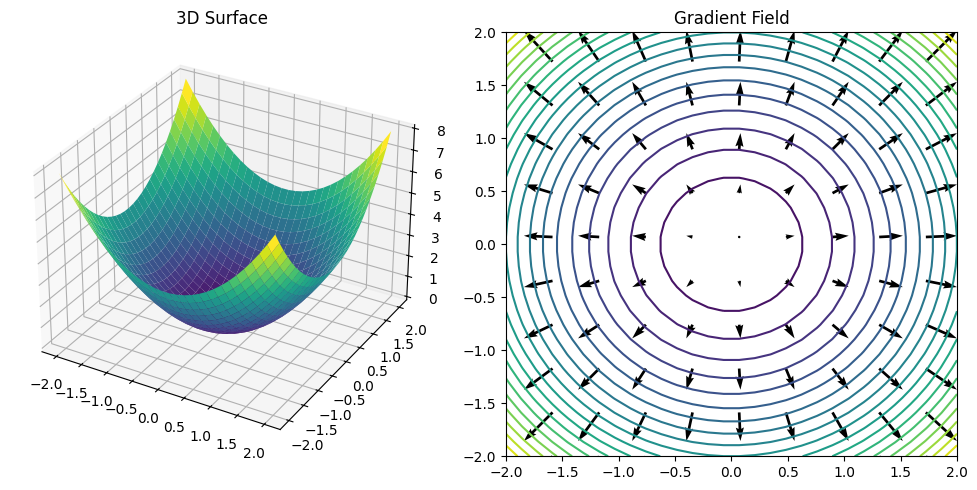

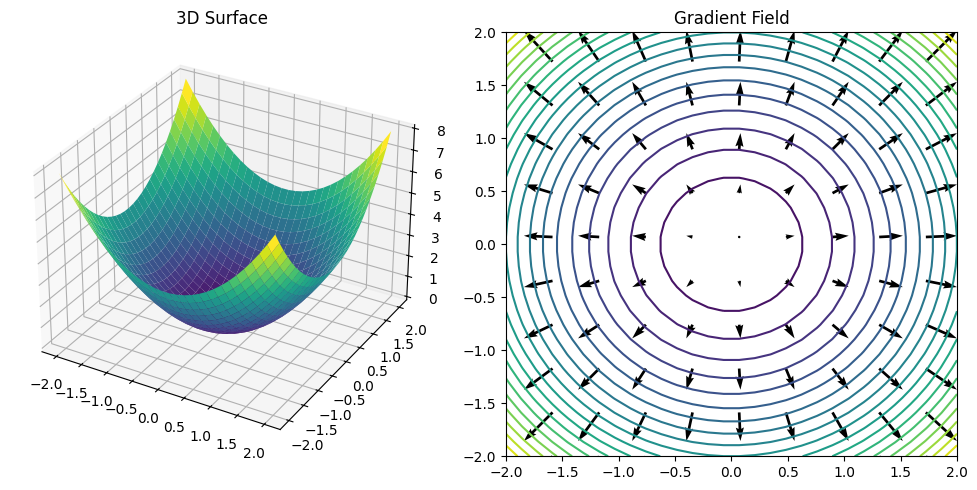

In [2]:
def plot_gradient_example():
    x = np.linspace(-2, 2, 30)
    y = np.linspace(-2, 2, 30)
    X, Y = np.meshgrid(x, y)
    
    # Simple quadratic function
    Z = X**2 + Y**2
    
    # Compute gradients
    dx = 2*X
    dy = 2*Y
    
    fig = plt.figure(figsize=(15, 5))
    
    # Surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis')
    ax1.set_title('3D Surface')
    
    # Contour with gradient field
    ax2 = fig.add_subplot(132)
    ax2.contour(X, Y, Z, levels=20)
    skip = 3
    ax2.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
               dx[::skip, ::skip], dy[::skip, ::skip],
               scale=50)
    ax2.set_title('Gradient Field')
    
    plt.tight_layout()
    return fig

plot_gradient_example()

## 2. The Chain Rule

### Single-Variable Chain Rule

For composite functions $h(x) = f(g(x))$, the chain rule states:

$\frac{d}{dx}h(x) = \frac{df}{dg} \cdot \frac{dg}{dx}$

Example:
If $h(x) = \sin(x^2)$, then:
$\frac{d}{dx}h(x) = \cos(x^2) \cdot 2x$

### Multivariate Chain Rule

For multivariate functions, if $z = f(y_1,...,y_n)$ and each $y_i = g_i(x_1,...,x_m)$:

$\frac{\partial z}{\partial x_i} = \sum_j \frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i}$

This is the foundation for backpropagation in neural networks.

## 3. Backpropagation

Backpropagation is the chain rule applied systematically to neural networks.

For a simple neural network:

$h = \sigma(Wx + b)$
$y = \sigma(Vh + c)$
$L = (y - t)^2$

The chain rule gives us:

$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial W}$

Where:
- $\frac{\partial L}{\partial y} = 2(y - t)$
- $\frac{\partial y}{\partial h} = \sigma'(Vh + c)V$
- $\frac{\partial h}{\partial W} = \sigma'(Wx + b)x^T$

Let's implement this:

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

class SimpleNN:
    def __init__(self, input_size=2, hidden_size=3, output_size=1):
        np.random.seed(42)
        self.W = np.random.randn(input_size, hidden_size)
        self.V = np.random.randn(hidden_size, output_size)
        
    def forward(self, x):
        self.x = x
        self.z1 = np.dot(x, self.W)
        self.h = sigmoid(self.z1)
        self.z2 = np.dot(self.h, self.V)
        self.y = sigmoid(self.z2)
        return self.y
    
    def backward(self, x, t):
        # Compute gradients
        dL_dy = 2 * (self.y - t)
        dy_dz2 = sigmoid_derivative(self.z2)
        dz2_dh = self.V
        dh_dz1 = sigmoid_derivative(self.z1)
        
        # Chain rule
        delta2 = dL_dy * dy_dz2
        self.dV = np.dot(self.h.T, delta2)
        delta1 = np.dot(delta2, dz2_dh.T) * dh_dz1
        self.dW = np.dot(x.T, delta1)
        
        return self.dW, self.dV

### Example: Training XOR Function

The XOR function is a classic example that requires a hidden layer to solve.

Truth table for XOR:
- (0,0) → 0
- (0,1) → 1
- (1,0) → 1
- (1,1) → 0

Let's train our network on this problem:

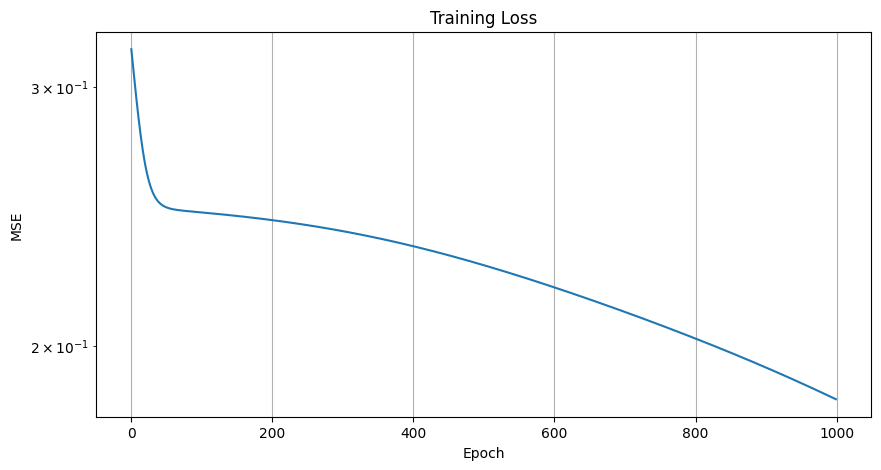

In [4]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

nn = SimpleNN()
learning_rate = 0.1
losses = []

for epoch in range(1000):
    # Forward pass
    output = nn.forward(X)
    loss = np.mean((output - y) ** 2)
    losses.append(loss)
    
    # Backward pass
    dW, dV = nn.backward(X, y)
    
    # Update weights
    nn.W -= learning_rate * dW
    nn.V -= learning_rate * dV

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.yscale('log')
plt.grid(True)
plt.show()


## Key Takeaways

1. The gradient gives us the direction of steepest increase
2. The chain rule lets us compute gradients of composite functions
3. Backpropagation is just the chain rule applied systematically to neural networks
4. Understanding these concepts is crucial for deep learning optimization